### Part 1: Data Preparation

In [1]:
import pandas as pd

In [2]:
myopia_df = pd.read_csv('Data/myopia.csv')
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Drop target column 'MYOPIC' - unneeded for unsupervised
myopia = myopia_df.drop(columns='MYOPIC')

print(f'Number of features in raw dataset: {len(myopia.columns)}')

Number of features in raw dataset: 14


In [4]:
# Scale data so large values don't outweight smaller values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
myopia_transformed = scaler.fit_transform(myopia)
myopia_transformed

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

### Part 2: Dimensionality Reduction

In [5]:
# Use principal component analysis to preserve 90% of variance
from sklearn.decomposition import PCA

pca = PCA(n_components=.9,random_state=9)
pca.fit(myopia_transformed)

PCA(n_components=0.9, random_state=9)

In [6]:
pca_column_names = []

for i in range(len(pca.explained_variance_ratio_)):
    pca_column_names.append(f'Principal Component {i+1}')

# Pandas dataframe containing results of PCA analysis    
pca_df = pd.DataFrame(pca.transform(myopia_transformed),columns=pca_column_names)

print(f'Number of features in PCA-reduced dataset: {len(pca_df.columns)}')
pca_df.head()

Number of features in PCA-reduced dataset: 10


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [7]:
# Perform TSNE analysis to further reduce dimensionality
from sklearn.manifold import TSNE

tsne = TSNE(random_state=9)
tsne_features = tsne.fit_transform(pca_df)
tsne_features

array([[  5.9947114,  -8.409686 ],
       [ 17.094898 , -22.045721 ],
       [ -5.347757 ,  18.149908 ],
       ...,
       [ 19.191183 , -22.628437 ],
       [-11.378921 ,  19.912853 ],
       [ 13.147888 , -12.530219 ]], dtype=float32)

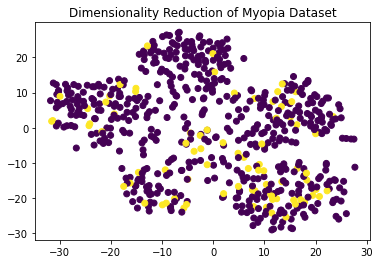

In [8]:
import matplotlib.pyplot as plt

tsne_x = tsne_features[:,0]
tsne_y = tsne_features[:,1]

# Plot results of PCA/TSNE analyses, coloring points by labels from original dataframe
plt.scatter(tsne_x,tsne_y,c=myopia_df['MYOPIC']);
plt.title('Dimensionality Reduction of Myopia Dataset');

The above scatterplot suggests 5 clusters that converge somewhat in the center, although this clustering does not distinctly separate patients with myopia from patients without myopia.

### Part 3: K-Means Cluster Analysis

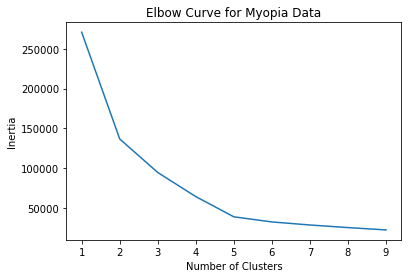

In [9]:
# Perform K-Means analysis and generate chart of elbow curve to determine best k
from sklearn.cluster import KMeans 

inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=9)
    kmeans.fit(tsne_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10),inertia);
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.title('Elbow Curve for Myopia Data');

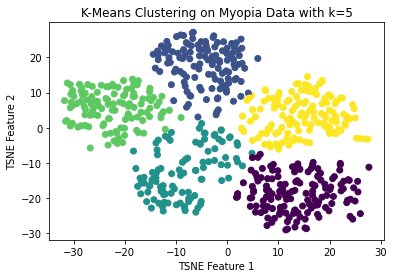

In [10]:
# Perform K-Means using k=5
kmeans_5 = KMeans(n_clusters=5,random_state=9)
kmeans_5.fit(tsne_features)
kmeans_5.transform(tsne_features)

# Assign labels to array
cluster_labels = kmeans_5.labels_

tsne_x = tsne_features[:,0]
tsne_y = tsne_features[:,1]

# Plot PCA/TSNE reduced data using K-Means clustering labels
plt.scatter(tsne_x,tsne_y,c=cluster_labels);
plt.xlabel('TSNE Feature 1');
plt.ylabel('TSNE Feature 2');
plt.title('K-Means Clustering on Myopia Data with k=5');

### Part 4: Recommendation

The above analyses support the notion that the patients in the myopia dataset can be subdivided into distinct patient clusters for individual analysis.